In [1]:
from hw2skeleton.k_means import k_means
from hw2skeleton.agglomerative import agglomerative
from hw2skeleton.utils import *
from hw2skeleton import io
import matplotlib.pyplot as plt
import sklearn.metrics as sk
from sklearn.decomposition import PCA
import hw2skeleton.cluster as cl
from sklearn.metrics import jaccard_similarity_score

In [2]:
sites = io.read_active_sites('data')

Read in 136 active sites


In [3]:
def compute_similarity_matrix(sites):
    simMat = []
    names = []
    for i in range(len(sites)):
        names.append(sites[i].name)
        row = []
        for j in range(len(sites)):
            row.append(cl.compute_similarity(sites[i].counts,sites[j].counts))
        simMat.append(row)
    simMat = pd.DataFrame(simMat, columns = names, index = names)

    return simMat

In [4]:
simMat = compute_similarity_matrix(sites)

In [5]:
kmeans_clusters, sc = k_means()

Read in 136 active sites


In [6]:
agg_clusters, sc = agglomerative()

Read in 136 active sites


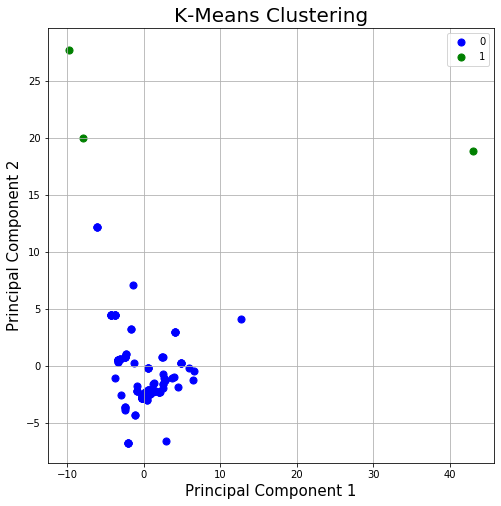

In [25]:
k = make_cluster_assign_df(kmeans_clusters, simMat)
k_pca = do_PCA(k, sites, simMat)
pca_plot(kmeans_clusters, k_pca)

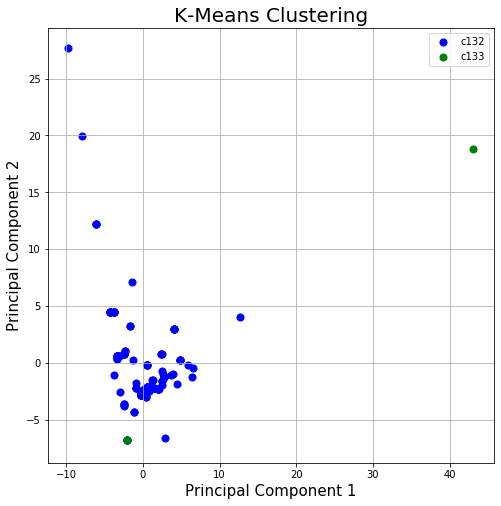

In [35]:
a = make_cluster_assign_df(agg_clusters, simMat)
a_pca = do_PCA(a, sites, simMat)
pca_plot(agg_clusters, a_pca)

In [ ]:
for row in a.index:
    if str(a.loc[row]).split(' ')[5].split('\n')[0] == 'c132':
        a.loc[row] = 0
    else:
        a.loc[row] = 1

In [52]:
jaccard_similarity_score(a,k)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9779411764705882